## Observations and Insights

## Dependencies and starter code

In [33]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Adding options to display all of the rows of DataFrame w/o truncation
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

# Study data files
mouse_metadata = 'data/Mouse_metadata.csv'
study_results = 'data/Study_results.csv'

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)


# Combine the data into a single dataset scc_df
# scc = Squamous cell carcinoma (SCC)
scc_df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID');

# Checking if all 250 mice are collected in the dataset
print(f"Total mice in merged dataset: {len(scc_df['Mouse ID'].unique())+1}")
print('\n')
print(list(scc_df.columns))
print('\n')
scc_df.head()

Total mice in merged dataset: 250


['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites']




,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [36]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean_of_tumor_volume = scc_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean()
median_of_tumor_volume = scc_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median()
variance_of_tumor_volume = scc_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std()
sem_of_tumor_volume = scc_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem()

summary_df = pd.DataFrame({'Mean':mean_of_tumor_volume,\
             'Median':median_of_tumor_volume,\
              'Variance':variance_of_tumor_volume,\
              'Standard Error of Mean':sem_of_tumor_volume})

summary_df.round(2)

,Mean,Median,Variance,Standard Error of Mean
Drug Regimen,,,,
Capomulin,40.68,41.56,4.99,0.33
Ceftamin,52.59,51.78,6.27,0.47
Infubinol,52.88,51.82,6.57,0.49
Ketapril,55.24,53.70,8.28,0.60
Naftisol,54.33,52.51,8.13,0.60
Placebo,54.03,52.29,7.82,0.58
Propriva,52.32,50.85,6.51,0.51
Ramicane,40.22,40.67,4.85,0.32
Stelasyn,54.23,52.43,7.71,0.57


## Bar plots

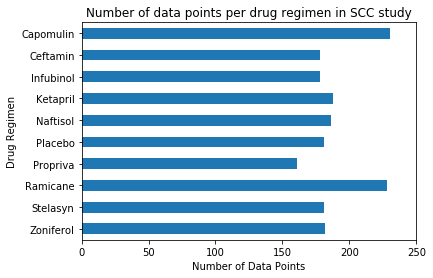

In [191]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
scc_datapoints = scc_df.groupby('Drug Regimen')['Mouse ID'].count()
scc_datapoints_chart = scc_datapoints.plot(kind='barh')
scc_datapoints_chart.invert_yaxis()
scc_datapoints_chart.set_xlim([0,250]);
scc_datapoints_chart.set_xlabel('Number of Data Points');
scc_datapoints_chart.set_title('Number of data points per drug regimen in SCC study');

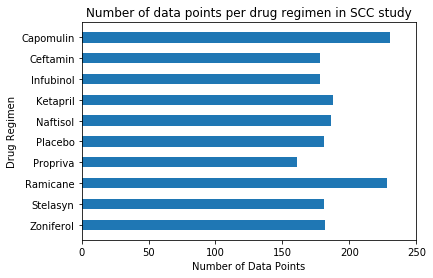

In [189]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
y_axis_ticks_placeholders = [_ for _ in summary_df.reset_index()['Drug Regimen']]
fig1, ax1 = plt.subplots()
ax1.set_xlabel('Number of Data Points');
ax1.set_title('Number of data points per drug regimen in SCC study');
ax1.set_ylabel('Drug Regimen');
ax1.set_xlim([0,250])
ax1.invert_yaxis();
ax1.barh(y_axis_ticks_placeholders, scc_datapoints, height = 0.5);

## Pie plots

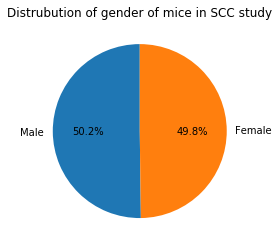

In [195]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# scc_df['Mouse ID'].unique()
gender_distribution = scc_df.groupby(['Mouse ID']).first()
gender_distribution = gender_distribution['Sex'].value_counts()

gender_distribution_chart = gender_distribution.plot(kind = 'pie', autopct='%1.1f%%',startangle=90);
gender_distribution_chart.set_ylabel('');
gender_distribution_chart.set_title('Distrubution of gender of mice in SCC study');

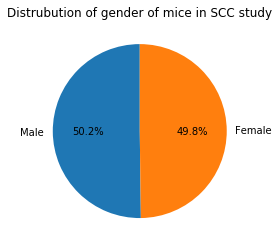

In [212]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
fig1, ax1 = plt.subplots()
# ax1.set_xlabel('Number of Data Points');
ax1.set_title('Distrubution of gender of mice in SCC study');
ax1.pie(gender_distribution, autopct='%1.1f%%',startangle=90, labels = ['Male','Female']);

## Quartiles, outliers and boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Four most promising treatment regimens: Capomulin (Our drug), Ramicane, Infubinol, Ceftamin

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and scatter plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

In [ ]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen